In [396]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras import utils as np_utils
from sklearn.metrics import confusion_matrix, precision_score,f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
%matplotlib inline

In [397]:
# os.getcwd()

In [398]:
df_data=pd.read_csv('UCI_Credit_Card.csv')

In [399]:
df_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [400]:
df_data[['SEX','MARRIAGE','EDUCATION']].describe()

,SEX,MARRIAGE,EDUCATION
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.551867,1.853133
std,0.489129,0.521970,0.790349
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,3.000000,6.000000


In [401]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

In [402]:
list(df_data)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

#### Observation based on the describe about the columns is that its has negative values which are not documented. So they should be 0, also 8 refers to the months of delay in the payments.

In [403]:
#desrcibe the payment status
df_data[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [404]:
#bill amount status
df_data[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [405]:
#previous payment status
df_data[['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [406]:
df_data['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [407]:
df_data=df_data.rename(columns={'default.payment.next.month':'def_pay','PAY_0':'PAY_1'})

In [408]:
df_data.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [409]:
df_data.shape
# Number of rows-30000(that is number of observations) whereas number of features-25

(30000, 25)

### Data Exploration

In [410]:
df_data['SEX'].value_counts()
# Defines the number of individuals belonging to different categories
#2-Female, 1-Male

2    18112
1    11888
Name: SEX, dtype: int64

In [411]:
df_data['MARRIAGE'].value_counts()
#0-Not defined, 1-Married, 2-Single, 3-Others

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [412]:
df_data['EDUCATION'].value_counts()
# .plot(kind='bar')
#0-Not defined, 1-Grad, 2-University, 3-High School, 4-Others, 5-Unknown, 6-Unknown

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [413]:
df_data.loc[df_data.MARRIAGE==0,'MARRIAGE']=3

In [414]:
df_data['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [415]:
col_nam= (df_data.EDUCATION == 5) | (df_data.EDUCATION == 6) | (df_data.EDUCATION == 0)
df_data.loc[col_nam,'EDUCATION']=4
df_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [416]:
col_1 = (df_data.PAY_1 == -2) | (df_data.PAY_1 == -1) 
df_data.loc[col_1, 'PAY_1'] = 0
col_2 = (df_data.PAY_2 == -2) | (df_data.PAY_2 == -1)
df_data.loc[col_2, 'PAY_2'] = 0
col_3 = (df_data.PAY_3 == -2) | (df_data.PAY_3 == -1)
df_data.loc[col_3, 'PAY_3'] = 0
col_4 = (df_data.PAY_4 == -2) | (df_data.PAY_4 == -1)
df_data.loc[col_4, 'PAY_4'] = 0
col_5 = (df_data.PAY_5 == -2) | (df_data.PAY_5 == -1)
df_data.loc[col_5, 'PAY_5'] = 0
col_6 = (df_data.PAY_6 == -2) | (df_data.PAY_6 == -1)
df_data.loc[col_6, 'PAY_6'] = 0
late = df_data[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]

In [417]:
df_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,0.356767,0.320033,0.304067,0.258767,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,0.760594,0.801727,0.790589,0.761113,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,0.000000,0.000000,0.000000,0.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [418]:
#To find relationship between the features
dep_gender=pd.crosstab(df_data.SEX,df_data.def_pay)

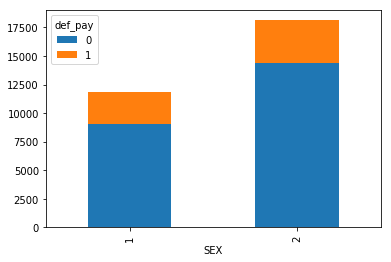

In [419]:
dep_gender.plot(kind='bar', stacked = True)

In [420]:
dep_gender

def_pay,0,1
SEX,,
1,9015,2873
2,14349,3763


In [421]:
dep_education=pd.crosstab(df_data.EDUCATION, df_data.def_pay)

In [422]:
def corr_2_col(col1,col2):
    cor_=pd.crosstab(col1,col2)
    cor_['perc']=cor_[1]/(cor_[0]+cor_[1])
    return cor_
    

In [423]:
corr_2_col(df_data.EDUCATION,df_data.def_pay)

def_pay,0,1,perc
EDUCATION,,,
1,8549,2036,0.192348
2,10700,3330,0.237349
3,3680,1237,0.251576
4,435,33,0.070513


In [424]:
corr_2_col(df_data.MARRIAGE,df_data.def_pay)

def_pay,0,1,perc
MARRIAGE,,,
1,10453,3206,0.234717
2,12623,3341,0.209283
3,288,89,0.236074


In [425]:
df_data[df_data.def_pay==1][['BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1', 'PAY_1',
     'LIMIT_BAL']].sample(10)

,BILL_AMT2,PAY_AMT1,BILL_AMT1,PAY_1,LIMIT_BAL
18614,42490.0,2068.0,43878.0,2,50000.0
24583,319219.0,12510.0,335002.0,0,340000.0
2186,3670.0,2500.0,14517.0,0,30000.0
27110,28053.0,2500.0,25991.0,0,130000.0
15947,2400.0,0.0,2400.0,3,30000.0
29921,411016.0,17259.0,468749.0,0,410000.0
27347,15666.0,1258.0,14658.0,0,160000.0
15320,0.0,0.0,0.0,0,170000.0
9472,220405.0,0.0,225416.0,2,440000.0
29929,1804.0,1804.0,1804.0,0,170000.0


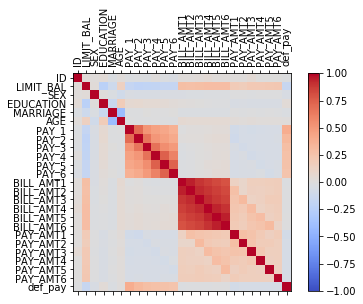

In [426]:
corr = df_data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_data.columns)
ax.set_yticklabels(df_data.columns)
plt.show()

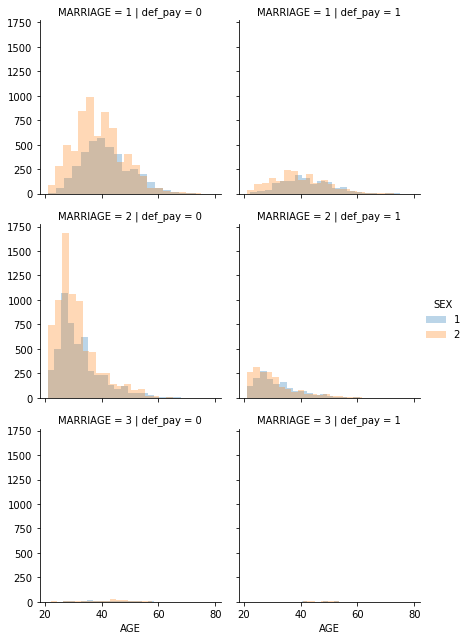

In [427]:
graph=sns.FacetGrid(df_data,col='def_pay',row='MARRIAGE',hue='SEX')
graph.map(plt.hist, 'AGE',alpha=0.3,bins=20)
graph.add_legend()

In [428]:
#One can combine the sex and marriage to different categories
df_data['Sex_marr']=0

In [429]:
df_data.loc[((df_data.SEX==1) & (df_data.MARRIAGE==1)),'Sex_marr']=1 #Married man
df_data.loc[((df_data.SEX==2) & (df_data.MARRIAGE==1)),'Sex_marr']=2 #Married woman
df_data.loc[((df_data.SEX==1) & (df_data.MARRIAGE==2)),'Sex_marr']=3 #Single man
df_data.loc[((df_data.SEX==2) & (df_data.MARRIAGE==2)),'Sex_marr']=4 #SIngle woman
df_data.loc[((df_data.SEX==1) & (df_data.MARRIAGE==3)),'Sex_marr']=5 #Other man
df_data.loc[((df_data.SEX==2) & (df_data.MARRIAGE==3)),'Sex_marr']=6 #Other woman

In [430]:
df_data.sample(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay,Sex_marr
8319,8320,50000.0,1,2,1,42,0,0,0,0,...,11374.0,5919.0,2133.0,1058.0,2000.0,2043.0,5919.0,16346.0,1,1
8836,8837,150000.0,2,4,2,27,0,0,0,0,...,8433.0,10332.0,22452.0,65676.0,20368.0,25.0,10363.0,4881.0,0,4
19870,19871,390000.0,2,2,1,34,0,0,0,0,...,-1228.0,-1228.0,759.0,699.0,115.0,712.0,0.0,235.0,0,2
29901,29902,50000.0,1,2,2,29,1,2,0,0,...,50248.0,49387.0,0.0,6556.0,3250.0,1563.0,1208.0,781.0,0,3
12460,12461,50000.0,2,3,1,36,0,0,0,0,...,8468.0,8768.0,1188.0,3000.0,176.0,169.0,300.0,1200.0,0,2
10561,10562,280000.0,2,2,2,29,0,0,0,0,...,0.0,5017.0,0.0,0.0,0.0,0.0,5017.0,101.0,0,4
23975,23976,20000.0,1,1,2,25,0,0,0,0,...,9404.0,6864.0,1200.0,2000.0,2000.0,1000.0,1000.0,1000.0,0,3
16611,16612,50000.0,1,2,1,31,0,0,2,2,...,0.0,0.0,2590.0,0.0,0.0,0.0,0.0,0.0,0,1
13080,13081,180000.0,2,1,2,33,0,0,0,0,...,47722.0,2500.0,5000.0,5000.0,3000.0,0.0,0.0,2598.0,0,4
3136,3137,20000.0,1,1,2,28,0,0,0,0,...,12249.0,19910.0,2700.0,4150.0,1500.0,577.0,8000.0,300.0,0,3


In [431]:
df_data['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

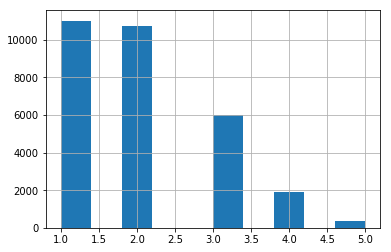

In [432]:
#binning age which is a continuous variable
df_data['AgeBin'] = pd.cut(df_data['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
df_data['AgeBin'] = pd.to_numeric(df_data['AgeBin'])
df_data.loc[(df_data['AgeBin'] == 6) , 'AgeBin'] = 5
df_data.AgeBin.hist()

In [433]:
corr_2_col(df_data.AgeBin,df_data.def_pay)

def_pay,0,1,perc
AgeBin,,,
1,8542,2471,0.224371
2,8524,2189,0.204331
3,4606,1399,0.232973
4,1449,481,0.249223
5,243,96,0.283186


In [434]:
df_data = df_data[['ID','LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2',
 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Sex_marr', 'AgeBin','def_pay']]

In [435]:
y=df_data['def_pay']
X=df_data[['ID','LIMIT_BAL','EDUCATION','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2',
 'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','Sex_marr','AgeBin']]

In [436]:
X.shape 

(30000, 23)

In [437]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [438]:
X_train.shape


(24000, 23)

In [440]:
def getAccuracy(predict,actual):
    accuracy = sum(predict == actual)/(float(len(actual)))*100
    return accuracy


def evaluation(y_pred,y_test):
    cm1 = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm1)

    # score_f1=f1_score(y_test, y_pred, average=None)  
    # print("F1 score:")
    # print(score_f1)

    # score_prec=precision_score(y_test, y_pred, average=None)  
    # print("Precision score:")
    # print(score_prec)

    all_eval=precision_recall_fscore_support(y_test, y_pred, average=None)
    print("Precision:", all_eval[0])
    print("Recall:", all_eval[1])
    print("F-Score:", all_eval[2])
    print("Support", all_eval[3])
    # print(all_eval[0])


In [441]:
y_pred=model.predict_classes(X_test)
scores = model.evaluate(X_test, y_test)
print('Loss:',float(scores[0]))
print('Accuracy:', scores[1]*100)
evaluation(y_pred,y_test)

6000/6000 [==============================] - 0s 44us/step
Loss: 10.29589406077067
Accuracy: 35.3
Confusion Matrix:
[[1190 3497]
 [ 385  928]]
Precision: [0.75555556 0.20971751]
Recall: [0.25389375 0.70677837]
F-Score: [0.38007027 0.32345765]
Support [4687 1313]


### Random Forest

In [442]:
##RANDOM FOREST
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier_RF.fit(X_SMOTE, y_SMOTE)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [443]:
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.metrics import confusion_matrix

y_pred = classifier_RF.predict(X_test)
Accuracy_val=getAccuracy(y_pred, y_test)
print("\nAccuracy for Random Forest",Accuracy_val)

evaluation(y_pred,y_test)


Accuracy for Random Forest 81.25
Confusion Matrix:
[[4355  332]
 [ 793  520]]
Precision: [0.8459596  0.61032864]
Recall: [0.92916578 0.3960396 ]
F-Score: [0.88561261 0.48036952]
Support [4687 1313]


### Resampling Data

In [444]:
df_train = X_train.join(y_train)
df_train.sample(10)

,ID,LIMIT_BAL,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Sex_marr,AgeBin,def_pay
8669,8670,310000.0,2,0,0,0,0,0,0,2647.0,...,3069.0,4206.0,1858.0,3057.0,2538.0,3069.0,6591.0,1,3,1
25970,25971,20000.0,3,0,0,0,0,0,0,1550.0,...,3755.0,1550.0,1826.0,6497.0,8185.0,3755.0,3220.0,4,2,0
26519,26520,30000.0,1,0,2,0,2,0,0,4743.0,...,23563.0,390.0,1000.0,3.0,20077.0,10000.0,1854.0,2,4,0
3779,3780,70000.0,1,0,0,0,0,0,0,63603.0,...,58347.0,7666.0,3800.0,1200.0,5000.0,4000.0,3000.0,3,1,0
24346,24347,150000.0,1,0,0,0,0,0,0,76215.0,...,24871.0,22365.0,10000.0,3993.0,15838.0,10000.0,7780.0,3,2,0
2989,2990,50000.0,3,0,0,0,0,0,0,3781.0,...,15876.0,1710.0,25000.0,754.0,600.0,800.0,1900.0,2,2,0
28815,28816,230000.0,1,2,0,0,0,0,0,125270.0,...,64818.0,6531.0,5091.0,3307.0,3316.0,2316.0,2500.0,4,2,1
14312,14313,300000.0,1,1,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,4,1
8488,8489,180000.0,1,0,0,0,0,0,0,154374.0,...,136665.0,7500.0,7000.0,5000.0,5000.0,6000.0,5137.0,3,2,0
16482,16483,50000.0,3,1,0,0,0,0,0,0.0,...,736.0,0.0,0.0,0.0,562.0,736.0,1269.0,4,4,1


In [445]:
from sklearn.utils import resample

In [446]:
df_majority = df_train[df_train.def_pay==0]
df_minority = df_train[df_train.def_pay==1]

In [447]:
print(df_majority.shape)
print(df_minority.shape)

(18677, 24)
(5323, 24)


### Upsampling of data

In [448]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=18677,    # to match majority class
                                 random_state=123) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# Display new class counts
df_upsampled.def_pay.value_counts()

1    18677
0    18677
Name: def_pay, dtype: int64

In [449]:
y_upsampled = df_upsampled.def_pay
X_upsampled = df_upsampled.drop(['def_pay'], axis= 1)
print(X_upsampled.shape)
print(y_upsampled.shape)

(37354, 23)
(37354,)


### Downsampling of data

In [450]:
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=5323,     # to match minority class
                                 random_state=123) # reproducible results
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
# Display new class counts
df_downsampled.def_pay.value_counts()

1    5323
0    5323
Name: def_pay, dtype: int64

In [451]:
y_downsampled = df_downsampled.def_pay
X_downsampled = df_downsampled.drop(['def_pay'], axis= 1)
print(X_downsampled.shape)
print(y_downsampled.shape)

(10646, 23)
(10646,)


### To create a synthetic sample I want to use the SMOTE algorithm, which is an oversampling method which creates synthetic samples from the minority class instead of creating copies

In [452]:
sm = SMOTE(random_state=123, ratio = 1.0)
X_SMOTE, y_SMOTE = sm.fit_sample(X_train, y_train)

In [453]:
print(X_SMOTE.shape)

(37354, 23)


### Random Forest Classifier 

In [454]:
# # SMOTE training set
# param_grid = {'n_estimators': [200, 400, 600, 1000],
#               'criterion': ['entropy', 'gini'], 'n_jobs' : [-1]}
# acc_scorer = make_scorer(f1_score)
# grid_forest = GridSearchCV(RandomForestClassifier(), param_grid, scoring = acc_scorer, cv=5)
# %time grid_forest = grid_forest.fit(X_SMOTE, y_SMOTE)
# print(grid_forest.best_estimator_)
# print(grid_forest.best_score_)
# forest_SMOTE = grid_forest.best_estimator_

In [455]:
forest_SMOTE = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

### AdaBoost Classifier

In [456]:
# # normal training set
# param_grid = {'n_estimators': [200,300,600,800],
#               'algorithm': ['SAMME', 'SAMME.R'],
#               'learning_rate' : [0.5, 0.75, 1.0]}
# acc_scorer = make_scorer(f1_score)
# grid_ada = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier(class_weight = "balanced")), 
#                         param_grid, scoring = acc_scorer, cv=5)
# %time grid_ada = grid_ada.fit(X_SMOTE, y_SMOTE)
# print(grid_ada.best_estimator_)
# print(grid_ada.best_score_)
# ada_normal = grid_ada.best_estimator_

In [457]:
ada_normal = AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.75, n_estimators=200, random_state=None)

### Gradient Boosting

In [458]:
# #SMOTE training set
# param_grid = {'n_estimators': [200,300,800],
#               'learning_rate' : [0.5, 0.75, 1.0]}
# acc_scorer = make_scorer(f1_score)
# grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid, scoring = acc_scorer, cv=5)
# %time grid_gbc = grid_gbc.fit(X_SMOTE, y_SMOTE)
# print(grid_gbc.best_estimator_)
# print(grid_gbc.best_score_)
# gbc_SMOTE = grid_gbc.best_estimator_

In [459]:
gbc_SMOTE = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

### Random Forest Classifier Accuracy

In [460]:
# SMOTE training
%time forest_SMOTE.fit(X_SMOTE, y_SMOTE)
y_pred = forest_SMOTE.predict(X_test)
Accuracy_val=getAccuracy(y_pred, y_test)
print("\nAccuracy for Random Forest",Accuracy_val)

evaluation(y_pred,y_test)

CPU times: user 1min 20s, sys: 0 ns, total: 1min 20s
Wall time: 6.92 s

Accuracy for Random Forest 81.13333333333334
Confusion Matrix:
[[4344  343]
 [ 789  524]]
Precision: [0.84628872 0.60438293]
Recall: [0.92681886 0.39908606]
F-Score: [0.88472505 0.48073394]
Support [4687 1313]


### AdaBoost Classifier

In [461]:
# SMOTE training
%time ada_normal.fit(X_SMOTE, y_SMOTE)
y_pred = ada_normal.predict(X_test)
Accuracy_val=getAccuracy(y_pred, y_test)
print("\nAccuracy for Random Forest",Accuracy_val)

evaluation(y_pred,y_test)

CPU times: user 552 ms, sys: 0 ns, total: 552 ms
Wall time: 551 ms

Accuracy for Random Forest 72.31666666666666
Confusion Matrix:
[[3793  894]
 [ 767  546]]
Precision: [0.83179825 0.37916667]
Recall: [0.80925965 0.41584158]
F-Score: [0.82037418 0.39665819]
Support [4687 1313]


### Gradient Boosting

In [462]:
# SMOTE training
%time gbc_SMOTE.fit(X_SMOTE, y_SMOTE)
y_pred = gbc_SMOTE.predict(X_test)
Accuracy_val=getAccuracy(y_pred, y_test)
print("\nAccuracy for Random Forest",Accuracy_val)

evaluation(y_pred,y_test)

CPU times: user 8.18 s, sys: 0 ns, total: 8.18 s
Wall time: 8.18 s

Accuracy for Random Forest 81.2
Confusion Matrix:
[[4368  319]
 [ 809  504]]
Precision: [0.84373189 0.61239368]
Recall: [0.93193941 0.38385377]
F-Score: [0.88564477 0.47191011]
Support [4687 1313]


### Neural Network with synthetic data

In [477]:
input_size = 23
# drop_out=0.1
first_dense_layer_nodes  = 128
second_dense_layer_nodes = first_dense_layer_nodes*3
third_dense_layer_nodes= second_dense_layer_nodes*3
validation_data_split = 0.1 #Spliting of training set in training and validation data.Eg-0.10(10% data as validation and 90% as training data)
num_epochs = 2000 #Max number of epochs
model_batch_size = 100
# tb_batch_size = 32
early_patience = 100 #Stops when the loss function remains contant or starts increasing depends upon monitor in earlystopping_cb


model = Sequential()
model.add(Dense(first_dense_layer_nodes, input_dim = input_size, activation = 'relu'))
model.add(Dense(second_dense_layer_nodes, activation = 'relu'))
model.add(Dense(third_dense_layer_nodes,activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.summary() 

model.compile(optimizer='adam',    #Optimizer helps in changing the weight(gradient decent). It helps in achieving the reduction of loss function by changing the weights)
                  loss='binary_crossentropy',  # Study again
                  metrics=['accuracy'])   #Because its a classification problem and requires accuracy
    

#Training of the model or algo is done in fitting

# tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

#Training of the model or algo is done in fitting
# abc = model.fit(X_train
#                     , y_train
#                     , validation_split=validation_data_split
#                     , epochs=num_epochs
#                     , batch_size=model_batch_size
#                     , callbacks = [earlystopping_cb]
#                    )

# df = pd.DataFrame(abc.history)
# df.plot(subplots=True, grid=True, figsize=(10,15))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 128)               3072      
_________________________________________________________________
dense_55 (Dense)             (None, 384)               49536     
_________________________________________________________________
dense_56 (Dense)             (None, 1152)              443520    
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 1153      
Total params: 497,281
Trainable params: 497,281
Non-trainable params: 0
_________________________________________________________________


Train on 33618 samples, validate on 3736 samples
Epoch 1/2000
33618/33618 [==============================] - 3s 97us/step - loss: 7.1653 - acc: 0.5554 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/2000
33618/33618 [==============================] - 2s 65us/step - loss: 7.1634 - acc: 0.5556 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/2000
33618/33618 [==============================] - 3s 83us/step - loss: 7.1634 - acc: 0.5556 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 4/2000
33618/33618 [==============================] - 2s 64us/step - loss: 7.1634 - acc: 0.5556 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 5/2000
33618/33618 [==============================] - 3s 79us/step - loss: 7.1634 - acc: 0.5556 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/2000
33618/33618 [==============================] - 2s 73us/step - loss: 7.1634 - acc: 0.5556 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 7/2000
33618/33618 [==============================] - 3s 74us/step - loss: 7.1634

33618/33618 [==============================] - 3s 97us/step - loss: 7.1634 - acc: 0.5556 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 58/2000
33618/33618 [==============================] - 3s 83us/step - loss: 7.1634 - acc: 0.5556 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 59/2000
33618/33618 [==============================] - 3s 88us/step - loss: 7.1634 - acc: 0.5556 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 60/2000
33618/33618 [==============================] - 3s 82us/step - loss: 7.1634 - acc: 0.5556 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 61/2000
33618/33618 [==============================] - 3s 77us/step - loss: 7.1634 - acc: 0.5556 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 62/2000
33618/33618 [==============================] - 2s 71us/step - loss: 7.1634 - acc: 0.5556 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 63/2000
33618/33618 [==============================] - 3s 81us/step - loss: 7.1634 - acc: 0.5556 - val_loss: 16.1181 - val_acc: 0.0000e+00

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fec3394e7b8>,
      dtype=object)

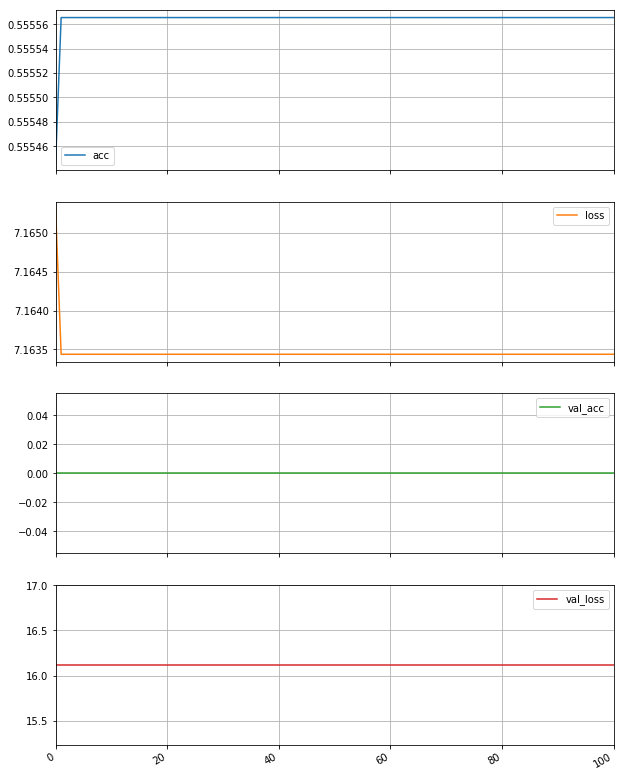

In [478]:
pqrs = model.fit(X_SMOTE
                    , y_SMOTE
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [earlystopping_cb]
                   )

df = pd.DataFrame(pqrs.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

In [479]:
y_pred=model.predict_classes(X_test)
scores = model.evaluate(X_test, y_test)
print('Loss:',float(scores[0]))
print('Accuracy:', scores[1]*100)
evaluation(y_pred,y_test)

6000/6000 [==============================] - 0s 64us/step
Loss: 3.5271765626271567
Accuracy: 78.11666666666667
Confusion Matrix:
[[4687    0]
 [1313    0]]
Precision: [0.78116667 0.        ]
Recall: [1. 0.]
F-Score: [0.87714045 0.        ]
Support [4687 1313]


In [471]:
xg_boost = XGBClassifier(n_estimators=1000, learning_rate=0.05)
%time xg_boost.fit(X_train, y_train, verbose=False)

CPU times: user 15.4 s, sys: 0 ns, total: 15.4 s
Wall time: 15.3 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [473]:
y_pred = xg_boost.predict(X_test)
Accuracy_val=getAccuracy(y_pred, y_test)
print("\nAccuracy for Random Forest",Accuracy_val)

evaluation(y_pred,y_test)


Accuracy for Random Forest 82.08333333333333
Confusion Matrix:
[[4446  241]
 [ 834  479]]
Precision: [0.84204545 0.66527778]
Recall: [0.94858118 0.3648134 ]
F-Score: [0.89214408 0.47122479]
Support [4687 1313]
